# Homework 2
### Jake Pitkin
**CS 6190: Probabilistic Modeling - Spring 2018**<br>
**February 19 2018**

**1. Create the following Bayesian network to analyze the survey results. You will want to use the provided function createCPTfromData.**

<img src="img/network.png" width="855" height="611" align="center"/>

First we will create the following Bayesian network using the Behavioral Risk Factor Surveillance System
(BRFSS) survey data. The source code for the Bayesian network is located in `bayesian_network.py`.

In [1]:
# Important! Blocks of code depend on each other in this project and should be ran in order.
from bayesian_network import *

# Read in the dataset
data = pd.read_csv("RiskFactors.csv")

# Create the Bayesian network from the dataset
income = createCPTfromData(data, ["income"])
bmi = createCPTfromData(data, ["bmi", "income", "exercise"])
exercise = createCPTfromData(data, ["exercise", "income"])
smoke = createCPTfromData(data, ["smoke", "income"])
bp = createCPTfromData(data, ["bp", "income", "exercise", "smoke"])
cholesterol = createCPTfromData(data, ["cholesterol", "income", "smoke", "exercise"])
diabetes = createCPTfromData(data, ["diabetes", "bmi"])
stroke = createCPTfromData(data, ["stroke", "bmi", "bp", "cholesterol"])
attack = createCPTfromData(data, ["attack", "bmi", "bp", "cholesterol"])
angina = createCPTfromData(data, ["angina", "bmi", "bp", "cholesterol"])
network = [income, bmi, exercise, smoke, bp, cholesterol, diabetes, stroke, attack, angina]
variables = ["income", "bmi", "exercise", "smoke", "bp", "cholesterol", "diabetes", "stroke", "attack", "angina"]

**1a. What is the size (in terms of the number of probabilities needed) of this network?**

The size of the network can be determined by considering the number of rows in each factor of the network.

In [2]:
rows = 0
for factor in network:
    rows += factor.shape[0]
print(rows)

504


The size of this network is 504 probabilities.

**1b. What is the total number of probabilities needed to store the full joint distribution?**

For the entire joint distribution, we take the product of the number of values each random variable can take:

$$\prod_{i=1}^{10} \ n(domain_i) = 8 * 2 * 2 * 4 * 4 * 2 * 2 * 2 * 2 * 4 = 32,768$$

The size of the full join distribution is 32,768 probabilities.

**2. For each of the four health outcomes (diabetes, stroke, heart attack, angina), answer the following by querying your network (using your infer function):**

**2a. What is the probabilitiy of the outcome if I have bad habits (smoke and don't exercise)?**

In [3]:
# English labels to replace numerical labels before printing table
diabetes_labels = ["yes", "only during pregnancy", "no", "pre-diabetic"]
stroke_labels = ["yes", "no"]
heart_attack_labels = ["yes", "no"]
angina_labels = ["yes", "no"]

# Variables to marginalize out of each inference
diabetes_marg = [x for x in variables if x != "diabetes"]
stroke_marg = [x for x in variables if x != "stroke"]
heart_attack_marg = [x for x in variables if x != "attack"]
angina_marg = [x for x in variables if x != "angina"]

print("Diabetes outcomes with bad habits:")
rows = 0
diabetes = infer(network, diabetes_marg, ["smoke", "exercise"], [1, 2])
diabetes = diabetes.drop("diabetes", 1)
diabetes = diabetes.rename(columns={'probs':'Probability'})
diabetes.insert(0, "Diabetes", diabetes_labels)
display(diabetes)
print()

print("Stroke outcomes with bad habits:")
stroke = infer(network, stroke_marg, ["smoke", "exercise"], [1, 2])
stroke = stroke.drop("stroke", 1)
stroke = stroke.rename(columns={'probs':'Probability'})
stroke.insert(0, "Stroke", stroke_labels)
display(stroke)
print()

print("Heart attack outcomes with bad habits:")
heart_attack = infer(network, heart_attack_marg, ["smoke", "exercise"], [1, 2])
heart_attack = heart_attack.drop("attack", 1)
heart_attack = heart_attack.rename(columns={'probs':'Probability'})
heart_attack.insert(0, "Heart Attack", heart_attack_labels)
display(heart_attack)
print()

print("Angina outcomes with bad habits:")
angina = infer(network, angina_marg, ["smoke", "exercise"], [1, 2])
angina = angina.drop("angina", 1)
angina = angina.rename(columns={'probs':'Probability'})
angina.insert(0, "Angina", angina_labels)
display(angina)
print()

Diabetes outcomes with bad habits:


,Diabetes,Probability
0,yes,0.159330
1,only during pregnancy,0.007881
2,no,0.812632
3,pre-diabetic,0.020156



Stroke outcomes with bad habits:


,Stroke,Probability
0,yes,0.050127
1,no,0.949873



Heart attack outcomes with bad habits:


,Heart Attack,Probability
0,yes,0.072415
1,no,0.927585



Angina outcomes with bad habits:


,Angina,Probability
0,yes,0.077756
1,no,0.922244


**2a. How about if I have good habits (don't smoke and do exercise)**

In [4]:
print("Diabetes outcomes with good habits:")
diabetes = infer(network, diabetes_marg, ["smoke", "exercise"], [2, 1])
diabetes = diabetes.drop("diabetes", 1)
diabetes = diabetes.rename(columns={'probs':'Probability'})
diabetes.insert(0, "Diabetes", diabetes_labels)
display(diabetes)
print()

print("Stroke outcomes with good habits:")
stroke = infer(network, stroke_marg, ["smoke", "exercise"], [2, 1])
stroke = stroke.drop("stroke", 1)
stroke = stroke.rename(columns={'probs':'Probability'})
stroke.insert(0, "Stroke", stroke_labels)
display(stroke)
print()

print("Heart attack outcomes with good habits:")
heart_attack = infer(network, heart_attack_marg, ["smoke", "exercise"], [2, 1])
heart_attack = heart_attack.drop("attack", 1)
heart_attack = heart_attack.rename(columns={'probs':'Probability'})
heart_attack.insert(0, "Heart Attack", heart_attack_labels)
display(heart_attack)
print()

print("Angina outcomes with good habits:")
angina = infer(network, angina_marg, ["smoke", "exercise"], [2, 1])
angina = angina.drop("angina", 1)
angina = angina.rename(columns={'probs':'Probability'})
angina.insert(0, "Angina", angina_labels)
display(angina)
print()

Diabetes outcomes with good habits:


,Diabetes,Probability
0,yes,0.135062
1,only during pregnancy,0.007674
2,no,0.839392
3,pre-diabetic,0.017873



Stroke outcomes with good habits:


,Stroke,Probability
0,yes,0.036808
1,no,0.963192



Heart attack outcomes with good habits:


,Heart Attack,Probability
0,yes,0.051027
1,no,0.948973



Angina outcomes with good habits:


,Angina,Probability
0,yes,0.052319
1,no,0.947681


**2b. What is the probability of the outcome if I have poor health (high blood pressure, high cholesterol, and overweight)?**

In [5]:
print("Diabetes outcomes with poor health:")
diabetes = infer(network, diabetes_marg, ["bp", "cholesterol", "bmi"], [1, 1, 3])
diabetes = diabetes.drop("diabetes", 1)
diabetes = diabetes.rename(columns={'probs':'Probability'})
diabetes.insert(0, "Diabetes", diabetes_labels)
display(diabetes)
print()

print("Stroke outcomes with poor health:")
stroke = infer(network, stroke_marg, ["bp", "cholesterol", "bmi"], [1, 1, 3])
stroke = stroke.drop("stroke", 1)
stroke = stroke.rename(columns={'probs':'Probability'})
stroke.insert(0, "Stroke", stroke_labels)
display(stroke)
print()

print("Heart attack outcomes with poor health:")
heart_attack = infer(network, heart_attack_marg, ["bp", "cholesterol", "bmi"], [1, 1, 3])
heart_attack = heart_attack.drop("attack", 1)
heart_attack = heart_attack.rename(columns={'probs':'Probability'})
heart_attack.insert(0, "Heart Attack", heart_attack_labels)
display(heart_attack)
print()

print("Angina outcomes with poor health:")
angina = infer(network, angina_marg, ["bp", "cholesterol", "bmi"], [1, 1, 3])
angina = angina.drop("angina", 1)
angina = angina.rename(columns={'probs':'Probability'})
angina.insert(0, "Angina", angina_labels)
display(angina)
print()

Diabetes outcomes with poor health:


,Diabetes,Probability
0,yes,0.122279
1,only during pregnancy,0.006718
2,no,0.854003
3,pre-diabetic,0.017000



Stroke outcomes with poor health:


,Stroke,Probability
0,yes,0.083975
1,no,0.916025



Heart attack outcomes with poor health:


,Heart Attack,Probability
0,yes,0.13433
1,no,0.86567



Angina outcomes with poor health:


,Angina,Probability
0,yes,0.153185
1,no,0.846815


**2b. How about if I have good health (low blood pressure, low cholesterol, and normal weight)?**

In [6]:
print("Diabetes outcomes with good health:")
diabetes = infer(network, diabetes_marg, ["bp", "cholesterol", "bmi"], [3, 2, 2])
diabetes = diabetes.drop("diabetes", 1)
diabetes = diabetes.rename(columns={'probs':'Probability'})
diabetes.insert(0, "Diabetes", diabetes_labels)
display(diabetes)
print()

print("Stroke outcomes with good health:")
stroke = infer(network, stroke_marg, ["bp", "cholesterol", "bmi"], [3, 2, 2])
stroke = stroke.drop("stroke", 1)
stroke = stroke.rename(columns={'probs':'Probability'})
stroke.insert(0, "Stroke", stroke_labels)
display(stroke)
print()

print("Heart attack outcomes with good health:")
heart_attack = infer(network, heart_attack_marg, ["bp", "cholesterol", "bmi"], [3, 2, 2])
heart_attack = heart_attack.drop("attack", 1)
heart_attack = heart_attack.rename(columns={'probs':'Probability'})
heart_attack.insert(0, "Heart Attack", heart_attack_labels)
display(heart_attack)
print()

print("Angina outcomes with good health:")
angina = infer(network, angina_marg, ["bp", "cholesterol", "bmi"], [3, 2, 2])
angina = angina.drop("angina", 1)
angina = angina.rename(columns={'probs':'Probability'})
angina.insert(0, "Angina", angina_labels)
display(angina)
print()

Diabetes outcomes with good health:


,Diabetes,Probability
0,yes,0.061634
1,only during pregnancy,0.007800
2,no,0.919897
3,pre-diabetic,0.010668



Stroke outcomes with good health:


,Stroke,Probability
0,yes,0.01387
1,no,0.98613



Heart attack outcomes with good health:


,Heart Attack,Probability
0,yes,0.015888
1,no,0.984112



Angina outcomes with good health:


,Angina,Probability
0,yes,0.012839
1,no,0.987161


**3. Evaluate the effect a person's income has on their probability of having one of the four health outcomes. For each of these four outcomes, plot their probability given income status.**

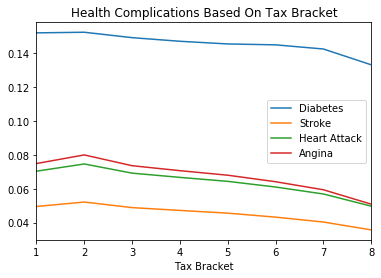

In [7]:
diabetes_probs = []
stroke_probs = []
heart_attack_probs = []
angina_probs = []
incomes = [1, 2, 3, 4, 5, 6, 7, 8]

for income in incomes:
    diabetes_prob = infer(network, diabetes_marg, ["income"], [income]).iloc[0]['probs']
    diabetes_probs.append(diabetes_prob)
    stroke_prob = infer(network, stroke_marg, ["income"], [income]).iloc[0]['probs']
    stroke_probs.append(stroke_prob)
    heart_attack_prob = infer(network, heart_attack_marg, ["income"], [income]).iloc[0]['probs']
    heart_attack_probs.append(heart_attack_prob)
    angina_prob = infer(network, angina_marg, ["income"], [income]).iloc[0]['probs']
    angina_probs.append(angina_prob)

%matplotlib inline
income_df = pd.DataFrame()
income_df['Tax Bracket'] = [1, 2, 3, 4, 5, 6, 7, 8]
income_df['Diabetes'] = diabetes_probs
income_df['Stroke'] = stroke_probs
income_df['Heart Attack'] = heart_attack_probs
income_df['Angina'] = angina_probs
income_df.plot(x='Tax Bracket', title="Health Complications Based On Tax Bracket")

**What can you conclude?**

According to our model, as you move up tax brackets you reduce your chances of all four health complications. There is an exception where the chances of health complications actually rises between tax brackets 1 and 2. My theory is individuals living in extreme poverty fall victim to other health complications before they experience these complications.

**4. Notice there are no links in the graph between the habits (smoking and exercise) and the outcomes. What assumption is this making about the effects of smoking and exercise on health problems?**

We are making the assumption there is not a direct link between smoking and exercising and health problems. We are stating that your habits affect certain levels in your body (bmi, blood pressure, cholesterol) and those affect you dealing with health problems. But we aren't conditioning health problems on habits directly.

**Let's test the validity of these assumptions. Create a second Bayesian network as above, but add edges from smoking to each of the four outcomes and edges from exercise to each of the four outcomes.**

In [12]:
income = createCPTfromData(data, ["income"])
diabetes_h = createCPTfromData(data, ["diabetes", "bmi", "smoke", "exercise"])
stroke_h = createCPTfromData(data, ["stroke", "bmi", "bp", "cholesterol", "smoke", "exercise"])
attack_h = createCPTfromData(data, ["attack", "bmi", "bp", "cholesterol", "smoke", "exercise"])
angina_h = createCPTfromData(data, ["angina", "bmi", "bp", "cholesterol", "smoke", "exercise"])

habit_network = [income, bmi, exercise, smoke, bp, cholesterol, diabetes_h, stroke_h, attack_h, angina_h]
variables = ["income", "bmi", "exercise", "smoke", "bp", "cholesterol", "diabetes", "stroke", "attack", "angina"]

**Now redo the queries in Question 2.**

In [13]:
# English labels to replace numerical labels before printing table
diabetes_labels = ["yes", "only during pregnancy", "no", "pre-diabetic"]
stroke_labels = ["yes", "no"]
heart_attack_labels = ["yes", "no"]
angina_labels = ["yes", "no"]

# Variables to marginalize out of each inference
diabetes_marg = [x for x in variables if x != "diabetes"]
stroke_marg = [x for x in variables if x != "stroke"]
heart_attack_marg = [x for x in variables if x != "attack"]
angina_marg = [x for x in variables if x != "angina"]

print("Diabetes outcomes with bad habits:")
diabetes = infer(network, diabetes_marg, ["smoke", "exercise"], [1, 2])
diabetes_habit = infer(habit_network, diabetes_marg, ["smoke", "exercise"], [1, 2])
change = [new - old for new, old in zip(diabetes_habit["probs"], diabetes["probs"])]
diabetes = diabetes.drop("diabetes", 1)
diabetes = diabetes.rename(columns={'probs':'Old Probability'})
diabetes.insert(0, "Diabetes", diabetes_labels)
diabetes["New Probability"] = diabetes_habit["probs"]
diabetes["Change"] = change
display(diabetes)
print()

print("Stroke outcomes with bad habits:")
stroke = infer(network, stroke_marg, ["smoke", "exercise"], [1, 2])
stroke_habit = infer(habit_network, stroke_marg, ["smoke", "exercise"], [1, 2])
change = [new - old for new, old in zip(stroke_habit["probs"], stroke["probs"])]
stroke = stroke.drop("stroke", 1)
stroke = stroke.rename(columns={'probs':'Old Probability'})
stroke.insert(0, "Stroke", stroke_labels)
stroke["New Probability"] = stroke_habit["probs"]
stroke["Change"] = change
display(stroke)
print()

print("Heart attack outcomes with bad habits:")
heart_attack = infer(network, heart_attack_marg, ["smoke", "exercise"], [1, 2])
heart_attack_habit = infer(habit_network, heart_attack_marg, ["smoke", "exercise"], [1, 2])
change = [new - old for new, old in zip(heart_attack_habit["probs"], heart_attack["probs"])]
heart_attack = heart_attack.drop("attack", 1)
heart_attack = heart_attack.rename(columns={'probs':'Old Probability'})
heart_attack.insert(0, "Heart Attack", heart_attack_labels)
heart_attack["New Probability"] = heart_attack_habit["probs"]
heart_attack["Change"] = change
display(heart_attack)
print()

print("Angina outcomes with bad habits:")
angina = infer(network, angina_marg, ["smoke", "exercise"], [1, 2])
angina_habit = infer(habit_network, angina_marg, ["smoke", "exercise"], [1, 2])
change = [new - old for new, old in zip(angina_habit["probs"], angina["probs"])]
angina = angina.drop("angina", 1)
angina = angina.rename(columns={'probs':'Old Probability'})
angina.insert(0, "Angina", angina_labels)
angina["New Probability"] = angina_habit["probs"]
angina["Change"] = change
display(angina)
print()

Diabetes outcomes with bad habits:


,Diabetes,Old Probability,New Probability,Change
0,yes,0.159330,0.226743,0.067412
1,only during pregnancy,0.007881,0.006208,-0.001673
2,no,0.812632,0.742921,-0.069711
3,pre-diabetic,0.020156,0.024128,0.003972



Stroke outcomes with bad habits:


,Stroke,Old Probability,New Probability,Change
0,yes,0.050127,0.079028,0.028901
1,no,0.949873,0.920972,-0.028901



Heart attack outcomes with bad habits:


,Heart Attack,Old Probability,New Probability,Change
0,yes,0.072415,0.117542,0.045126
1,no,0.927585,0.882458,-0.045126



Angina outcomes with bad habits:


,Angina,Old Probability,New Probability,Change
0,yes,0.077756,0.114263,0.036507
1,no,0.922244,0.885737,-0.036507


In [14]:
print("Diabetes outcomes with good habits:")
diabetes = infer(network, diabetes_marg, ["smoke", "exercise"], [2, 1])
diabetes_habit = infer(habit_network, diabetes_marg, ["smoke", "exercise"], [2, 1])
change = [new - old for new, old in zip(diabetes_habit["probs"], diabetes["probs"])]
diabetes = diabetes.drop("diabetes", 1)
diabetes = diabetes.rename(columns={'probs':'Old Probability'})
diabetes.insert(0, "Diabetes", diabetes_labels)
diabetes["New Probability"] = diabetes_habit["probs"]
diabetes["Change"] = change
display(diabetes)
print()

print("Stroke outcomes with good habits:")
stroke = infer(network, stroke_marg, ["smoke", "exercise"], [2, 1])
stroke_habit = infer(habit_network, stroke_marg, ["smoke", "exercise"], [2, 1])
change = [new - old for new, old in zip(stroke_habit["probs"], stroke["probs"])]
stroke = stroke.drop("stroke", 1)
stroke = stroke.rename(columns={'probs':'Old Probability'})
stroke.insert(0, "Stroke", stroke_labels)
stroke["New Probability"] = stroke_habit["probs"]
stroke["Change"] = change
display(stroke)
print()

print("Heart attack outcomes with good habits:")
heart_attack = infer(network, heart_attack_marg, ["smoke", "exercise"], [2, 1])
heart_attack_habit = infer(habit_network, heart_attack_marg, ["smoke", "exercise"], [2, 1])
change = [new - old for new, old in zip(heart_attack_habit["probs"], heart_attack["probs"])]
heart_attack = heart_attack.drop("attack", 1)
heart_attack = heart_attack.rename(columns={'probs':'Old Probability'})
heart_attack.insert(0, "Heart Attack", heart_attack_labels)
heart_attack["New Probability"] = heart_attack_habit["probs"]
heart_attack["Change"] = change
display(heart_attack)
print()

print("Angina outcomes with good habits:")
angina = infer(network, angina_marg, ["smoke", "exercise"], [2, 1])
angina_habit = infer(habit_network, angina_marg, ["smoke", "exercise"], [2, 1])
change = [new - old for new, old in zip(angina_habit["probs"], angina["probs"])]
angina = angina.drop("angina", 1)
angina = angina.rename(columns={'probs':'Old Probability'})
angina.insert(0, "Angina", angina_labels)
angina["New Probability"] = angina_habit["probs"]
angina["Change"] = change
display(angina)
print()

Diabetes outcomes with good habits:


,Diabetes,Old Probability,New Probability,Change
0,yes,0.135062,0.102528,-0.032535
1,only during pregnancy,0.007674,0.008884,0.001210
2,no,0.839392,0.873671,0.034280
3,pre-diabetic,0.017873,0.014917,-0.002955



Stroke outcomes with good habits:


,Stroke,Old Probability,New Probability,Change
0,yes,0.036808,0.025339,-0.01147
1,no,0.963192,0.974661,0.01147



Heart attack outcomes with good habits:


,Heart Attack,Old Probability,New Probability,Change
0,yes,0.051027,0.030385,-0.020643
1,no,0.948973,0.969615,0.020643



Angina outcomes with good habits:


,Angina,Old Probability,New Probability,Change
0,yes,0.052319,0.035964,-0.016354
1,no,0.947681,0.964036,0.016354


In [15]:
print("Diabetes outcomes with poor health:")
diabetes = infer(network, diabetes_marg, ["bp", "cholesterol", "bmi"], [1, 1, 3])
diabetes_habit = infer(habit_network, diabetes_marg, ["bp", "cholesterol", "bmi"], [1, 1, 3])
change = [new - old for new, old in zip(diabetes_habit["probs"], diabetes["probs"])]
diabetes = diabetes.drop("diabetes", 1)
diabetes = diabetes.rename(columns={'probs':'Old Probability'})
diabetes.insert(0, "Diabetes", diabetes_labels)
diabetes["New Probability"] = diabetes_habit["probs"]
diabetes["Change"] = change
display(diabetes)
print()

print("Stroke outcomes with poor health:")
stroke = infer(network, stroke_marg, ["bp", "cholesterol", "bmi"], [1, 1, 3])
stroke_habit = infer(habit_network, stroke_marg, ["bp", "cholesterol", "bmi"], [1, 1, 3])
change = [new - old for new, old in zip(stroke_habit["probs"], stroke["probs"])]
stroke = stroke.drop("stroke", 1)
stroke = stroke.rename(columns={'probs':'Old Probability'})
stroke.insert(0, "Stroke", stroke_labels)
stroke["New Probability"] = stroke_habit["probs"]
stroke["Change"] = change
display(stroke)
print()

print("Heart attack outcomes with poor health:")
heart_attack = infer(network, heart_attack_marg, ["bp", "cholesterol", "bmi"], [1, 1, 3])
heart_attack_habit = infer(habit_network, heart_attack_marg, ["bp", "cholesterol", "bmi"], [1, 1, 3])
change = [new - old for new, old in zip(heart_attack_habit["probs"], heart_attack["probs"])]
heart_attack = heart_attack.drop("attack", 1)
heart_attack = heart_attack.rename(columns={'probs':'Old Probability'})
heart_attack.insert(0, "Heart Attack", heart_attack_labels)
heart_attack["New Probability"] = heart_attack_habit["probs"]
heart_attack["Change"] = change
display(heart_attack)
print()

print("Angina outcomes with poor health:")
angina = infer(network, angina_marg, ["bp", "cholesterol", "bmi"], [1, 1, 3])
angina_habit = infer(habit_network, angina_marg, ["bp", "cholesterol", "bmi"], [1, 1, 3])
change = [new - old for new, old in zip(angina_habit["probs"], angina["probs"])]
angina = angina.drop("angina", 1)
angina = angina.rename(columns={'probs':'Old Probability'})
angina.insert(0, "Angina", angina_labels)
angina["New Probability"] = angina_habit["probs"]
angina["Change"] = change
display(angina)
print()

Diabetes outcomes with poor health:


,Diabetes,Old Probability,New Probability,Change
0,yes,0.122279,0.131074,0.008794
1,only during pregnancy,0.006718,0.006500,-0.000217
2,no,0.854003,0.844574,-0.009429
3,pre-diabetic,0.017000,0.017852,0.000852



Stroke outcomes with poor health:


,Stroke,Old Probability,New Probability,Change
0,yes,0.083975,0.085754,0.001779
1,no,0.916025,0.914246,-0.001779



Heart attack outcomes with poor health:


,Heart Attack,Old Probability,New Probability,Change
0,yes,0.13433,0.136162,0.001832
1,no,0.86567,0.863838,-0.001832



Angina outcomes with poor health:


,Angina,Old Probability,New Probability,Change
0,yes,0.153185,0.154869,0.001684
1,no,0.846815,0.845131,-0.001684


In [16]:
print("Diabetes outcomes with good health:")
diabetes = infer(network, diabetes_marg, ["bp", "cholesterol", "bmi"], [3, 2, 2])
diabetes_habit = infer(habit_network, diabetes_marg, ["bp", "cholesterol", "bmi"], [3, 2, 2])
change = [new - old for new, old in zip(diabetes_habit["probs"], diabetes["probs"])]
diabetes = diabetes.drop("diabetes", 1)
diabetes = diabetes.rename(columns={'probs':'Old Probability'})
diabetes.insert(0, "Diabetes", diabetes_labels)
diabetes["New Probability"] = diabetes_habit["probs"]
diabetes["Change"] = change
display(diabetes)
print()

print("Stroke outcomes with good health:")
stroke = infer(network, stroke_marg, ["bp", "cholesterol", "bmi"], [3, 2, 2])
stroke_habit = infer(habit_network, stroke_marg, ["bp", "cholesterol", "bmi"], [3, 2, 2])
change = [new - old for new, old in zip(stroke_habit["probs"], stroke["probs"])]
stroke = stroke.drop("stroke", 1)
stroke = stroke.rename(columns={'probs':'Old Probability'})
stroke.insert(0, "Stroke", stroke_labels)
stroke["New Probability"] = stroke_habit["probs"]
stroke["Change"] = change
display(stroke)
print()

print("Heart attack outcomes with good health:")
heart_attack = infer(network, heart_attack_marg, ["bp", "cholesterol", "bmi"], [3, 2, 2])
heart_attack_habit = infer(habit_network, heart_attack_marg, ["bp", "cholesterol", "bmi"], [3, 2, 2])
change = [new - old for new, old in zip(heart_attack_habit["probs"], heart_attack["probs"])]
heart_attack = heart_attack.drop("attack", 1)
heart_attack = heart_attack.rename(columns={'probs':'Old Probability'})
heart_attack.insert(0, "Heart Attack", heart_attack_labels)
heart_attack["New Probability"] = heart_attack_habit["probs"]
heart_attack["Change"] = change
display(heart_attack)
print()

print("Angina outcomes with good health:")
angina = infer(network, angina_marg, ["bp", "cholesterol", "bmi"], [3, 2, 2])
angina_habit = infer(habit_network, angina_marg, ["bp", "cholesterol", "bmi"], [3, 2, 2])
change = [new - old for new, old in zip(angina_habit["probs"], angina["probs"])]
angina = angina.drop("angina", 1)
angina = angina.rename(columns={'probs':'Old Probability'})
angina.insert(0, "Angina", angina_labels)
angina["New Probability"] = angina_habit["probs"]
angina["Change"] = change
display(angina)
print()

Diabetes outcomes with good health:


,Diabetes,Old Probability,New Probability,Change
0,yes,0.061634,0.057654,-0.003980
1,only during pregnancy,0.007800,0.007969,0.000169
2,no,0.919897,0.924009,0.004113
3,pre-diabetic,0.010668,0.010367,-0.000301



Stroke outcomes with good health:


,Stroke,Old Probability,New Probability,Change
0,yes,0.01387,0.013354,-0.000516
1,no,0.98613,0.986646,0.000516



Heart attack outcomes with good health:


,Heart Attack,Old Probability,New Probability,Change
0,yes,0.015888,0.015265,-0.000623
1,no,0.984112,0.984735,0.000623



Angina outcomes with good health:


,Angina,Old Probability,New Probability,Change
0,yes,0.012839,0.012437,-0.000402
1,no,0.987161,0.987563,0.000402


**What was the effect, and do you think the assumptions of the first graph were valid or not?**

**Habits:** By adding a direct link from habits to complications, we saw an increase in the effect your habits have on developing complications. With bad habits, your chances of getting a complication went up. With good habits, they went down. (See the "Change" column of the habits graphs)

**Health:** But this change in the network made little change on the results compared to the original network. This make sense. Health is concerned with blood pressure, cholesterol, and bmi. Added links between habits and complications shouldn't affect these results. (See the "Change" column of the health graphs)

I find the assumptions made in the second graph to be more valid. I think your habits have a more direct connection to health complications.

**5. Also notice there are no edges between the four outcomes. What assumption is this making about the interactions between health problems?**

Having one health problem doesn't play a direct role in you having another health problem. In other words, a health problem doesn't exacerbate other health problems. My intuition is this is incorrect.

**Make a third network, starting from the network in Question 4, but adding an edge from diabetes to stroke.**

In [ ]:
# New Bayesian network with connections between habits and outcomes as well as between diabetes and stroke
stroke_h2 = createCPTfromData(data, ["stroke", "bmi", "bp", "cholesterol", "smoke", "exercise", "diabetes"])

habit_network_2 = [income, bmi, exercise, smoke, bp, cholesterol, diabetes_h, stroke_h2, attack_h, angina_h]

print("Stroke given you have diabetes without added edge:")
stroke_given_diabetes = infer(habit_network, stroke_marg, ["diabetes"], [1])
stroke_given_diabetes = stroke_given_diabetes.drop("stroke", 1)
stroke_given_diabetes = stroke_given_diabetes.rename(columns={'probs':'Probability'})
stroke_given_diabetes.insert(0, "Stroke", stroke_labels)
stroke_given_diabetes.drop(stroke_given_diabetes.index[[1]], inplace=True)
display(stroke_given_diabetes)
print()

print("Stroke given you have diabetes with added edge:")
stroke_given_diabetes = infer(habit_network_2, stroke_marg, ["diabetes"], [1])
stroke_given_diabetes = stroke_given_diabetes.drop("stroke", 1)
stroke_given_diabetes = stroke_given_diabetes.rename(columns={'probs':'Probability'})
stroke_given_diabetes.insert(0, "Stroke", stroke_labels)
stroke_given_diabetes.drop(stroke_given_diabetes.index[[1]], inplace=True)
display(stroke_given_diabetes)
print()

print("Stroke given you don't have diabetes without added edge:")
stroke_no_diabetes = infer(habit_network, stroke_marg, ["diabetes"], [3])
stroke_no_diabetes = stroke_no_diabetes.drop("stroke", 1)
stroke_no_diabetes = stroke_no_diabetes.rename(columns={'probs':'Probability'})
stroke_no_diabetes.insert(0, "Stroke", stroke_labels)
stroke_no_diabetes.drop(stroke_no_diabetes.index[[1]], inplace=True)
display(stroke_no_diabetes)
print()

print("Stroke given you don't have diabetes with added edge:")
stroke_no_diabetes = infer(habit_network_2, stroke_marg, ["diabetes"], [3])
stroke_no_diabetes = stroke_no_diabetes.drop("stroke", 1)
stroke_no_diabetes = stroke_no_diabetes.rename(columns={'probs':'Probability'})
stroke_no_diabetes.insert(0, "Stroke", stroke_labels)
stroke_no_diabetes.drop(stroke_no_diabetes.index[[1]], inplace=True)
display(stroke_no_diabetes)
print()

Stroke given you have diabetes without added edge:


,Stroke,Probability
0,yes,0.045101



Stroke given you have diabetes with added edge:


,Stroke,Probability
0,yes,0.076428



Stroke given you don't have diabetes without added edge:


,Stroke,Probability
0,yes,0.041229



Stroke given you don't have diabetes with added edge:


**For both networks, evaluate the following probabilities:**

First the probabilities using the network from question 4:

$$P(stroke = 1 \ | \ diabetes = 1) = 0.045101$$

$$P(stroke = 1 \ | \ diabetes = 3) = 0.041229$$

The same queries but using a network with an edge added from diabetes to stroke:

$$P(stroke = 1 \ | \ diabetes = 1) = 0.076428$$

$$P(stroke = 1 \ | \ diabetes = 3) = 0.035863$$

**Again, what was the effect, and was the assumption about the interaction between diabetes
and stroke valid?**

By adding an edge from diabetes to stroke, the outcomes of the inference changed. We saw an increase in your chances of having a stroke if you already have diabetes by roughly $3.1\%$. Additionally, your chances of having a stroke were lowered by roughly $0.5\%$ assuming you don't have diabetes.

I think this is a valid assumption. I think there is a link between diabetes and having a stroke. Both could have independent hereditary factors, but I think both are affected by your lifestyle. Thus, if you have diabetes I think you are more at risk of having a stroke.

**6. Finally, make sure that your code runs correctly on all of the examples in BayesNetExamples.py. Your code will be graded for correctness on these also.**

I made some small changes to the provided examples to get them to behave correctly with my code. When _infer_ is called, the arguments need to be passed as lists even if there is only one item in the list (in the example code it is passed as a single element. This effects the Bishop book examples so I included the fixed version here.

In [31]:
#############################
## Bishop book (Ch 8) example
#############################
b = createCPT(['battery'], [0.9, 0.1], [[1, 0]])
f = createCPT(['fuel'], [0.9, 0.1], [[1, 0]])
gbf = createCPT(['gauge', 'battery', 'fuel'], [0.8, 0.2, 0.2, 0.1, 0.2, 0.8, 0.8, 0.9], [[1, 0], [1, 0], [1, 0]])

carNet = [b, f, gbf]

## Some examples:
## Notice that different order of operations give the same answer
## (rows/columns may be permuted)
productFactor(productFactor(b, f), gbf)
productFactor(productFactor(gbf, f), b)

marginalizeFactor(productFactor(gbf, b), 'gauge')
productFactor(marginalizeFactor(gbf, 'gauge'), b)

productFactor(marginalizeFactor(productFactor(gbf, b), 'battery'), f)
marginalizeFactor(productFactor(productFactor(gbf, f), b), 'battery')

marginalizeFactor(productFactor(marginalizeFactor(productFactor(gbf, b), 'battery'), f), 'gauge')
marginalizeFactor(productFactor(marginalizeFactor(productFactor(gbf, b), 'battery'), f), 'fuel')

## Examples computed in book (see pg. 377)
A = infer(carNet, ['battery', 'fuel'], [], [])      ## (8.30)
print("Expected: {} Actual: {}".format(0.315, A.iloc[1]['probs']))
B = infer(carNet, ['battery'], ['fuel'], [0])           ## (8.31)
print("Expected: {} Actual: {}".format(0.81, B.iloc[1]['probs']))
C = infer(carNet, ['battery'], ['gauge'], [0])          ## (8.32)
print("Expected: {} Actual: {}".format(0.257, C.iloc[1]['probs']))
D = infer(carNet, [], ['gauge', 'battery'], [0, 0]) ## (8.33)
print("Expected: {} Actual: {}".format(0.111, D.iloc[1]['probs']))

Expected: 0.315 Actual: 0.315
Expected: 0.81 Actual: 0.81
Expected: 0.257 Actual: 0.2571428571428572
Expected: 0.111 Actual: 0.11111111111111112


In [2]:
from bayesian_network import *

b = createCPT(['b'], [0.001, 0.999], [['T','F']])
e = createCPT(['e'], [0.002, 0.998], [['T', 'F']])
ja = createCPT(['a', 'j'], [0.9, 0.1, 0.05, 0.95], [['T', 'F'],['T','F']])
print(ja)
ma = createCPT(['a', 'm'], [0.7, 0.3, 0.01, 0.99], [['T', 'F'],['T', 'F']])
abe = createCPT(['a', 'b', 'e'], [0.95, 0.94, 0.29, 0.001, 0.05, 0.06, 0.71, 0.999], [['T','F'],['T','F'],['T','F']])

net = [b, e, ja, ma, abe]

B = createCPT(['B'], [0.75, 0.25], [['T', 'F']])
CB = createCPT(['C', 'B'], [1/3, 1/2, 2/3, 1/2], [['T', 'F'], ['T', 'F']])
AC = createCPT(['A', 'C'], [1/4, 2/3, 3/4, 1/3], [['T', 'F'], ['T', 'F']])
net2 = [B, CB, AC]

infer(net2, [], [], [])

   probs  j  a
0   0.90  T  T
1   0.10  F  T
2   0.05  T  F
3   0.95  F  F
   probs  B
0   0.75  T
1   0.25  F
      probs  B  C
0  0.333333  T  T
1  0.500000  F  T
2  0.666667  T  F
3  0.500000  F  F
      probs  C  A
0  0.250000  T  T
1  0.666667  F  T
2  0.750000  T  F
3  0.333333  F  F
      probs  C  B  A
0  0.062500  T  T  T
1  0.333333  F  T  T
2  0.031250  T  F  T
3  0.083333  F  F  T
4  0.187500  T  T  F
5  0.166667  F  T  F
6  0.093750  T  F  F
7  0.041667  F  F  F


,probs,C,B,A
0,0.062500,T,T,T
1,0.333333,F,T,T
2,0.031250,T,F,T
3,0.083333,F,F,T
4,0.187500,T,T,F
5,0.166667,F,T,F
6,0.093750,T,F,F
7,0.041667,F,F,F
